In [14]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###  Please check the Logistic Regression videos for data set information.

In [15]:
data = pd.read_csv("diabetes.csv") # Reading the Data


# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [16]:
print (data.shape)

(768, 9)


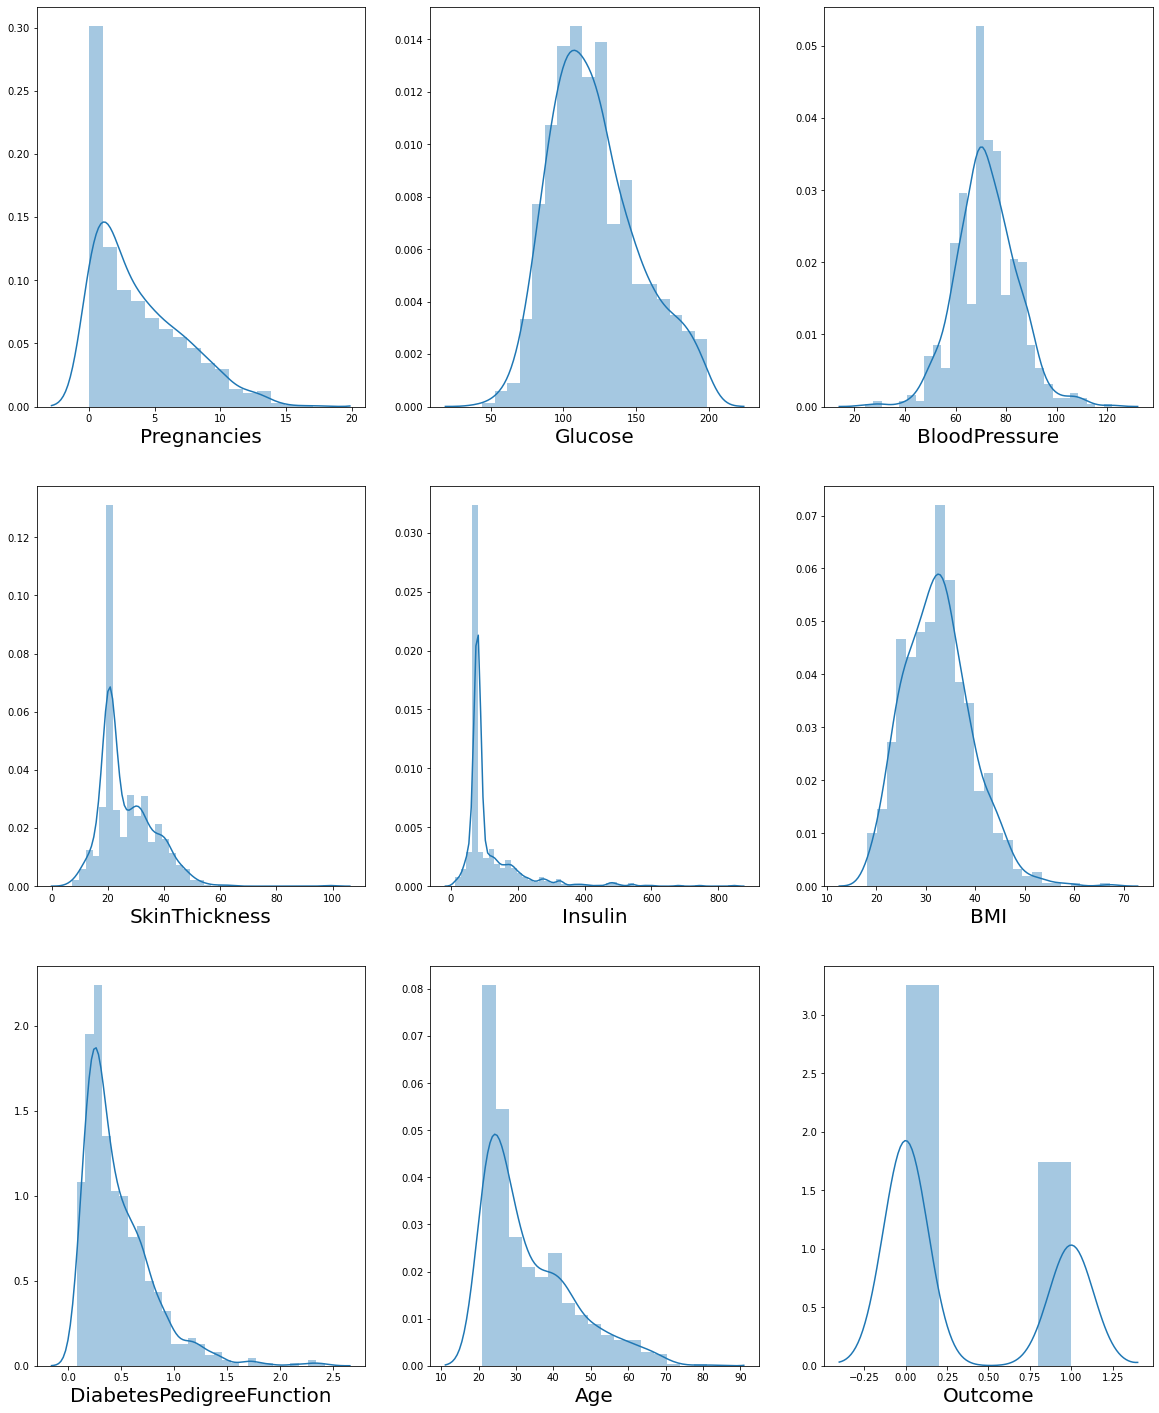

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

# Apply Log transformation on continues variable

In [18]:
data['Insulin'] = np.log(data['Insulin'])
data['BloodPressure'] = np.log(data['BloodPressure'])
data['SkinThickness'] = np.log(data['SkinThickness'])
data['BMI'] = np.log(data['BMI'])
data['DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction'])
data['Age'] = np.log(data['Age'])

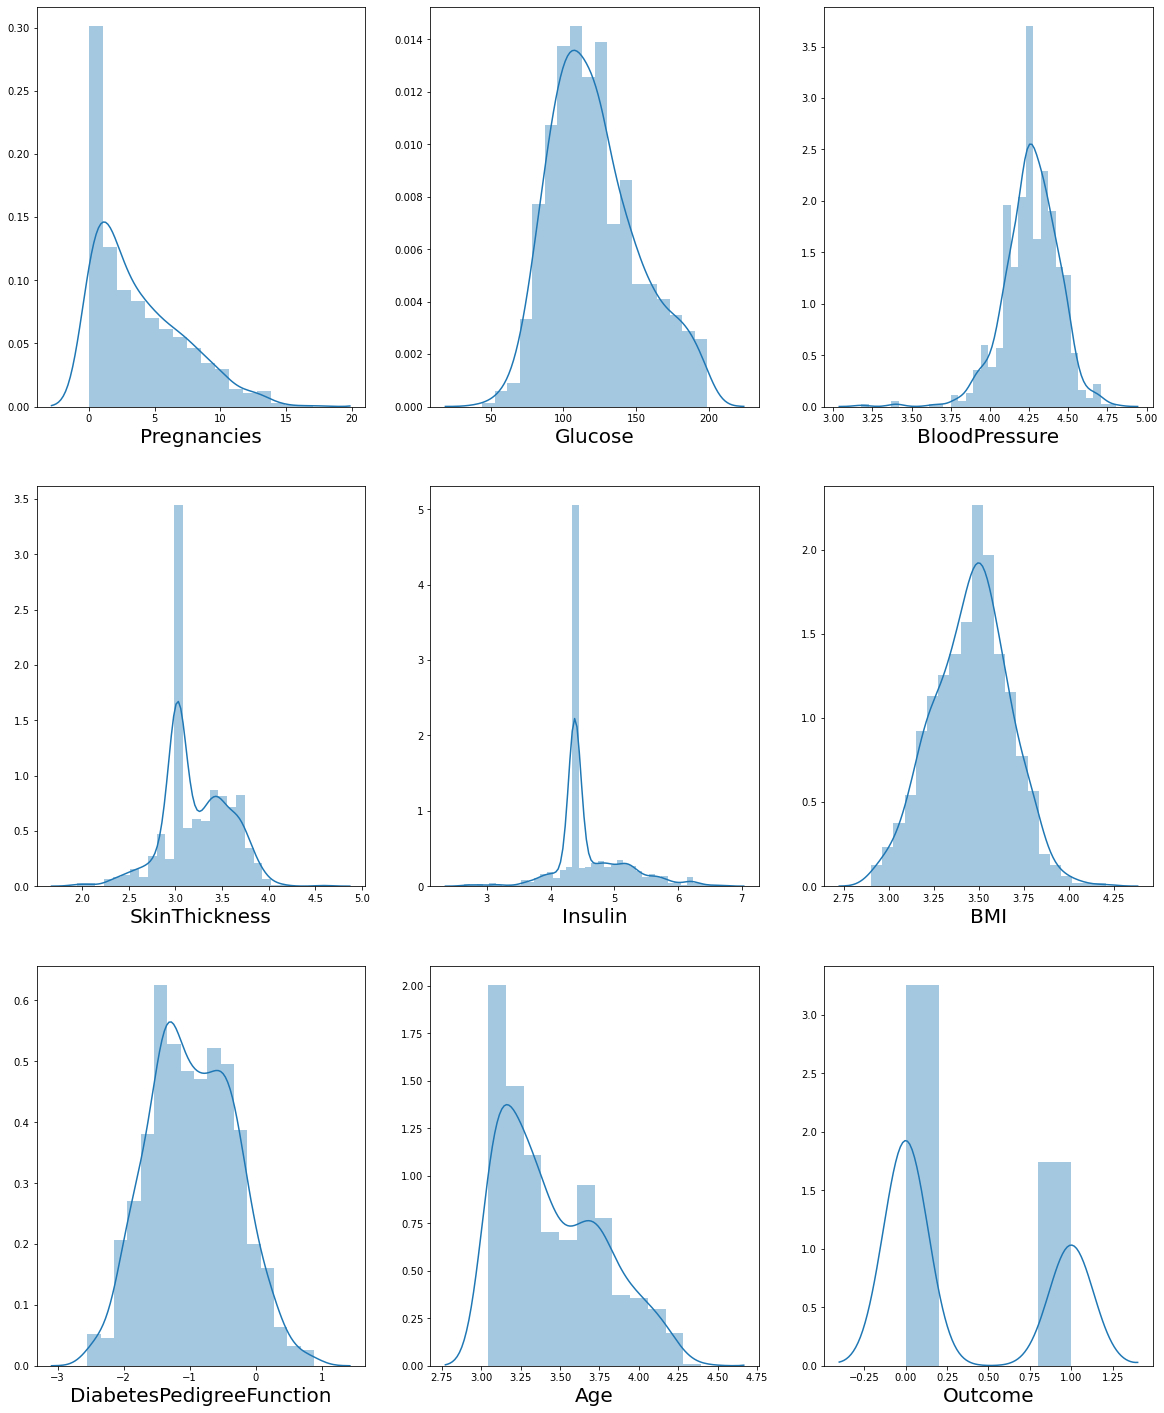

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

# Power transformer

In [20]:
# Read files

data = pd.read_csv("diabetes.csv") # Reading the Data


# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [21]:
features = ['Insulin','BMI','BloodPressure','SkinThickness','Age']

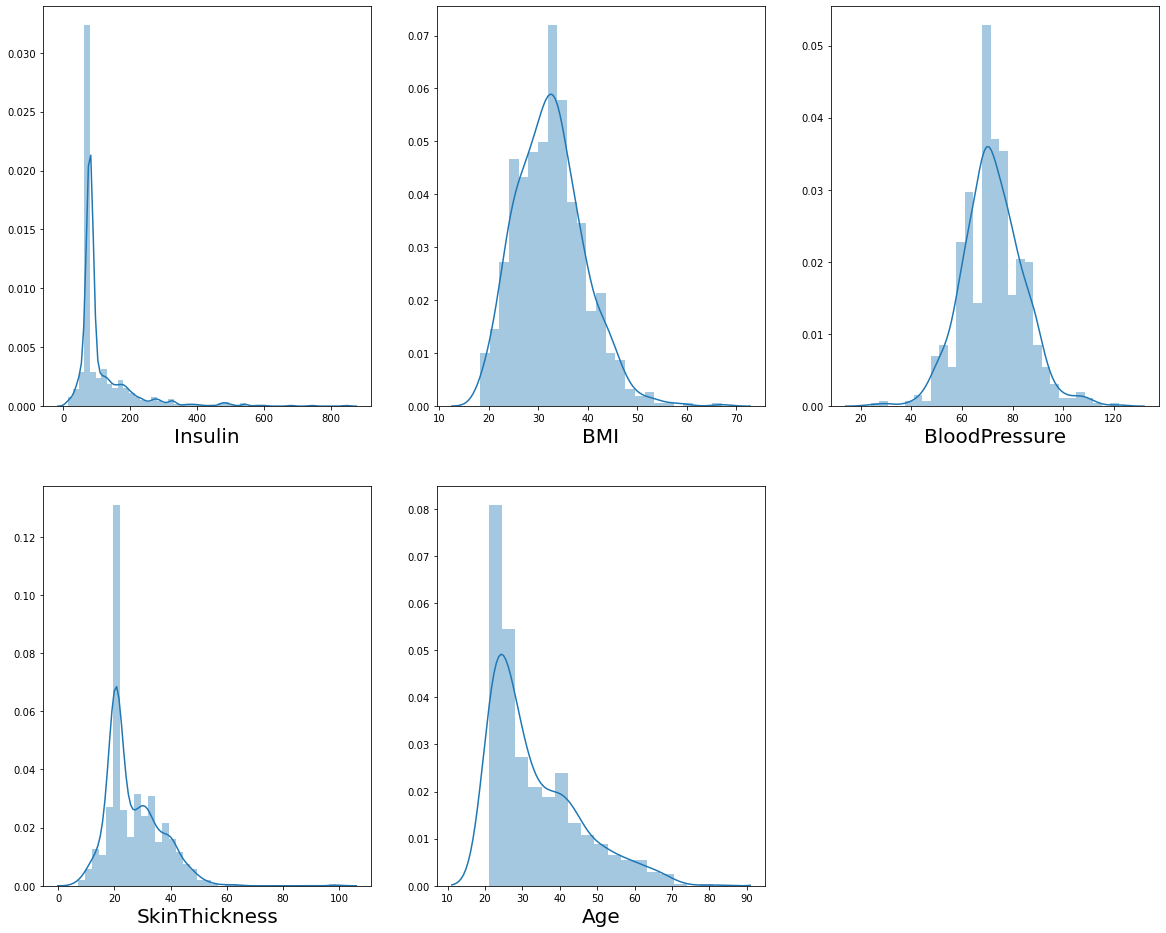

In [22]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data[features]:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

### - Box-Cox works with only positive values ( > 0)
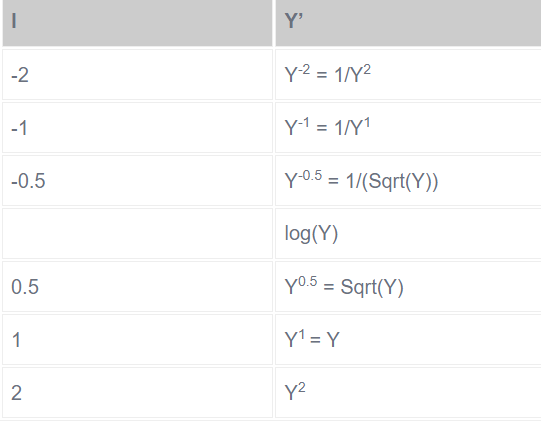



### - Yeo-Johnson works with both positive and negative values.

In [23]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [24]:
data[features] = scaler.fit_transform(data[features].values)

In [25]:
data[features]

,Insulin,BMI,BloodPressure,SkinThickness,Age
0,-0.350666,0.261508,-0.009147,0.956846,1.362797
1,-0.350666,-0.841776,-0.507220,0.415886,0.127990
2,-0.350666,-1.457249,-0.674630,-0.567991,0.231506
3,-0.025195,-0.584749,-0.507220,-0.246245,-1.483064
4,1.006677,1.462877,-2.750268,0.956846,0.328461
...,...,...,...,...,...
763,1.117625,0.161140,0.319657,1.873163,1.764261
764,-0.350666,0.697359,-0.174501,0.211217,-0.366775
765,0.305525,-0.912547,-0.009147,-0.246245,0.017237
766,-0.350666,-0.260838,-1.011681,-0.567991,1.236934


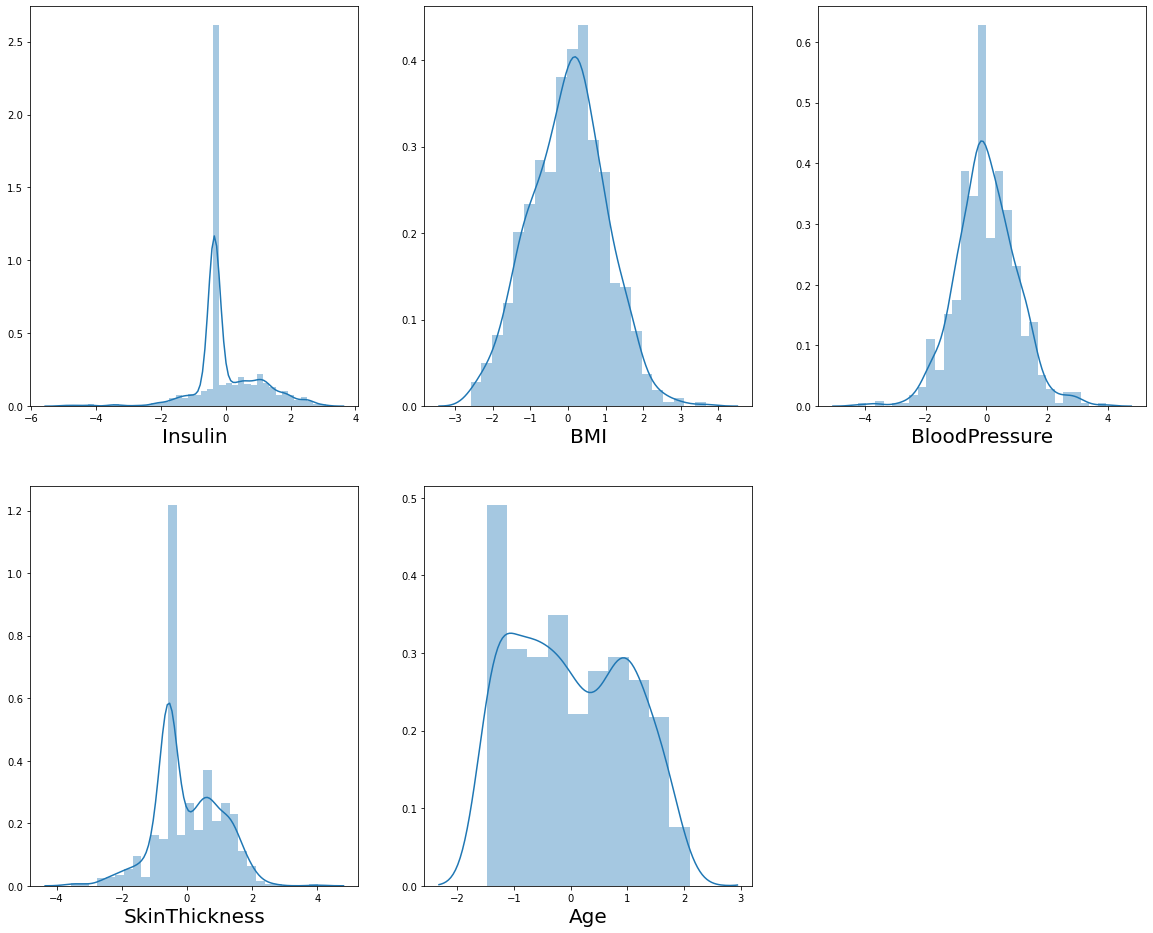

In [26]:
# let's see how data is distributed for every column after power transformer
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data[features]:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

## If power transformer applied on all features then, you can continue applying Train test split with above transformed data